In [8]:
# ==============================
# 1. Importação e configurações
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_classif, mutual_info_classif

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette="muted", font_scale=1.1)


In [9]:
# ==============================
# 2. Carregamento dos dados
# ==============================
df = pd.read_csv(
    "C:/Users/sofia/OneDrive - Universidade do Minho/4º Ano/1º Semestre/DAA/Trabalho/DAA-TG/training_data.csv",
    encoding='latin1'   # evitar erros de acentuação
)

print("✅ Dados carregados com sucesso.")
print(f"Dimensões: {df.shape[0]} linhas x {df.shape[1]} colunas\n")
display(df.head(10))

print("\nℹ️ Informações gerais:")
df.info()


✅ Dados carregados com sucesso.
Dimensões: 6812 linhas x 14 colunas



,city_name,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN
0,Porto,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,NaN,0.0,NaN
1,Porto,2018-08-10 14:00:00,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,céu claro,0.0,NaN
2,Porto,2019-09-01 16:00:00,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,NaN,0.0,NaN
3,Porto,2019-02-26 11:00:00,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,céu claro,0.0,NaN
4,Porto,2019-06-06 12:00:00,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,NaN,0.0,NaN
5,Porto,2018-11-15 07:00:00,Medium,52.4,5.6,68.5,LOW_LIGHT,13.0,1014.0,72.0,4.0,nuvens dispersas,0.0,NaN
6,Porto,2018-10-03 21:00:00,NaN,45.7,4.0,79.8,DARK,16.0,1020.0,58.0,0.0,céu claro,0.0,NaN
7,Porto,2018-08-25 19:00:00,Low,40.9,11.8,87.8,LIGHT,19.0,1014.0,64.0,5.0,céu claro,0.0,NaN
8,Porto,2019-06-30 12:00:00,Low,36.4,10.6,72.6,LIGHT,21.0,1019.0,82.0,5.0,céu pouco nublado,0.0,NaN
9,Porto,2019-04-20 09:00:00,Low,34.8,10.1,84.4,LIGHT,19.0,1018.0,55.0,3.0,céu limpo,0.0,NaN



ℹ️ Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city_name                6812 non-null   object 
 1   record_date              6812 non-null   object 
 2   AVERAGE_SPEED_DIFF       4612 non-null   object 
 3   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64
 4   AVERAGE_TIME_DIFF        6812 non-null   float64
 5   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64
 6   LUMINOSITY               6812 non-null   object 
 7   AVERAGE_TEMPERATURE      6812 non-null   float64
 8   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64
 9   AVERAGE_HUMIDITY         6812 non-null   float64
 10  AVERAGE_WIND_SPEED       6812 non-null   float64
 11  AVERAGE_CLOUDINESS       4130 non-null   object 
 12  AVERAGE_PRECIPITATION    6812 non-null   float64
 13  AVERAGE_RAIN             563 non-null    object 
dtype

In [ ]:
# ==============================
# 3. Análise geral e limpeza inicial
# ==============================

# Valores em falta
print("\n Valores em falta por coluna:")
print(df.isnull().sum())

# Duplicados
print("\nDuplicados:", df.duplicated().sum())

# Como só temos uma cidade:
if df['city_name'].nunique() == 1:
    df.drop(columns=['city_name'], inplace=True)

# Tratar colunas com muitos nulos
# df.drop(columns=['AVERAGE_RAIN'], inplace=True)   --> ESTA COLUNA TEM GRANDE % DE VALORES NULOS
# df['AVERAGE_CLOUDINESS'] = df['AVERAGE_CLOUDINESS'].fillna('Sem dados')   --> COLUNA IMPORTANTE -- NÃO É BOM REMOVÊ-LA



📉 Valores em falta por coluna:
city_name                     0
record_date                   0
AVERAGE_SPEED_DIFF         2200
AVERAGE_FREE_FLOW_SPEED       0
AVERAGE_TIME_DIFF             0
AVERAGE_FREE_FLOW_TIME        0
LUMINOSITY                    0
AVERAGE_TEMPERATURE           0
AVERAGE_ATMOSP_PRESSURE       0
AVERAGE_HUMIDITY              0
AVERAGE_WIND_SPEED            0
AVERAGE_CLOUDINESS         2682
AVERAGE_PRECIPITATION         0
AVERAGE_RAIN               6249
dtype: int64

Duplicados: 0


In [ ]:
# ==============================
# 4. Estatísticas descritivas
# ==============================
print("\n Estatísticas descritivas (numéricas):")
display(df.describe())

print("\n Estatísticas descritivas (categóricas):")
display(df.describe(include='object'))



📈 Estatísticas descritivas (numéricas):


,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_PRECIPITATION
count,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.0
mean,40.661010,25.637111,81.143952,16.193482,1017.388139,80.084190,3.058573,0.0
std,4.119023,33.510507,8.294401,5.163492,5.751061,18.238863,2.138421,0.0
min,30.500000,0.000000,46.400000,0.000000,985.000000,14.000000,0.000000,0.0
25%,37.600000,2.275000,75.400000,13.000000,1015.000000,69.750000,1.000000,0.0
50%,40.700000,12.200000,82.400000,16.000000,1017.000000,83.000000,3.000000,0.0
75%,43.500000,36.200000,87.400000,19.000000,1021.000000,93.000000,4.000000,0.0
max,55.900000,296.500000,112.000000,35.000000,1033.000000,100.000000,14.000000,0.0



📋 Estatísticas descritivas (categóricas):


,record_date,AVERAGE_SPEED_DIFF,LUMINOSITY,AVERAGE_CLOUDINESS
count,6812,4612,6812,6812
unique,6812,4,3,10
top,2019-08-29 07:00:00,Medium,LIGHT,Sem dados
freq,1,1651,3293,2682


In [ ]:
# ==============================
# 5. Conversão de datas e features temporais
# ==============================
df['record_date'] = pd.to_datetime(df['record_date'], errors='coerce')
'''
df['year'] = df['record_date'].dt.year
df['month'] = df['record_date'].dt.month
df['day'] = df['record_date'].dt.day
df['hour'] = df['record_date'].dt.hour
df['day_of_week'] = df['record_date'].dt.day_name()
'''
print("\n Conversão de data concluída.")
display(df[['record_date', 'year', 'month', 'day', 'hour', 'day_of_week']].head())



✅ Conversão de data concluída.


,record_date,year,month,day,hour,day_of_week
0,2019-08-29 07:00:00,2019,8,29,7,Thursday
1,2018-08-10 14:00:00,2018,8,10,14,Friday
2,2019-09-01 16:00:00,2019,9,1,16,Sunday
3,2019-02-26 11:00:00,2019,2,26,11,Tuesday
4,2019-06-06 12:00:00,2019,6,6,12,Thursday


In [ ]:
### ENTENDER ONDE É que FOMOS  buscar a informação do dia da semanak

In [ ]:
# display(df.head(10))


,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,year,month,day,hour,day_of_week,target_num
0,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,Sem dados,0.0,2019,8,29,7,Thursday,1.0
1,2018-08-10 14:00:00,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,céu claro,0.0,2018,8,10,14,Friday,2.0
2,2019-09-01 16:00:00,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,Sem dados,0.0,2019,9,1,16,Sunday,2.0
3,2019-02-26 11:00:00,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,céu claro,0.0,2019,2,26,11,Tuesday,2.0
4,2019-06-06 12:00:00,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,Sem dados,0.0,2019,6,6,12,Thursday,1.0
5,2018-11-15 07:00:00,Medium,52.4,5.6,68.5,LOW_LIGHT,13.0,1014.0,72.0,4.0,nuvens dispersas,0.0,2018,11,15,7,Thursday,1.0
6,2018-10-03 21:00:00,NaN,45.7,4.0,79.8,DARK,16.0,1020.0,58.0,0.0,céu claro,0.0,2018,10,3,21,Wednesday,NaN
7,2018-08-25 19:00:00,Low,40.9,11.8,87.8,LIGHT,19.0,1014.0,64.0,5.0,céu claro,0.0,2018,8,25,19,Saturday,0.0
8,2019-06-30 12:00:00,Low,36.4,10.6,72.6,LIGHT,21.0,1019.0,82.0,5.0,céu pouco nublado,0.0,2019,6,30,12,Sunday,0.0
9,2019-04-20 09:00:00,Low,34.8,10.1,84.4,LIGHT,19.0,1018.0,55.0,3.0,céu limpo,0.0,2019,4,20,9,Saturday,0.0



📊 Distribuição das classes no target:
AVERAGE_SPEED_DIFF
Medium       1651
Low          1419
High         1063
Very_High     479
Name: count, dtype: int64


C:\Users\sofia\AppData\Local\Temp\ipykernel_4144\2465937121.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=target, order=df[target].value_counts().index, palette='viridis')


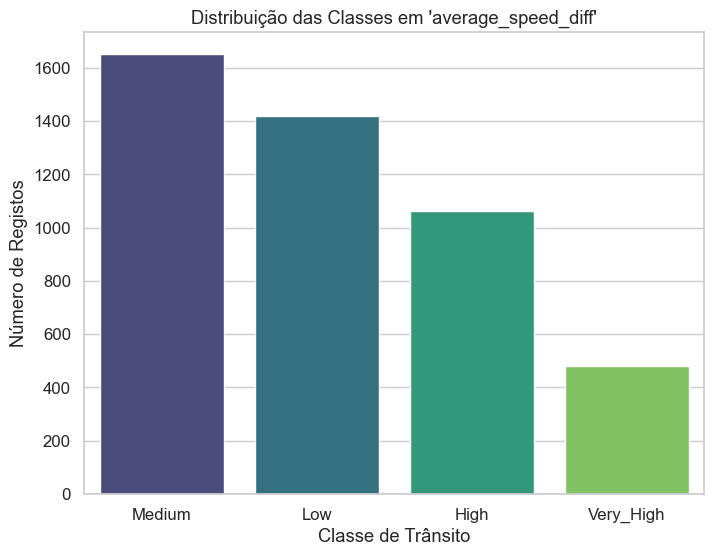

In [13]:
# ==============================
# 6. Análise da variável alvo
# ==============================
target = 'AVERAGE_SPEED_DIFF'

print("\n📊 Distribuição das classes no target:")
print(df[target].value_counts())

plt.figure(figsize=(8,6))
sns.countplot(data=df, x=target, order=df[target].value_counts().index, palette='viridis')
plt.title("Distribuição das Classes em 'average_speed_diff'")
plt.xlabel("Classe de Trânsito")
plt.ylabel("Número de Registos")
plt.show()


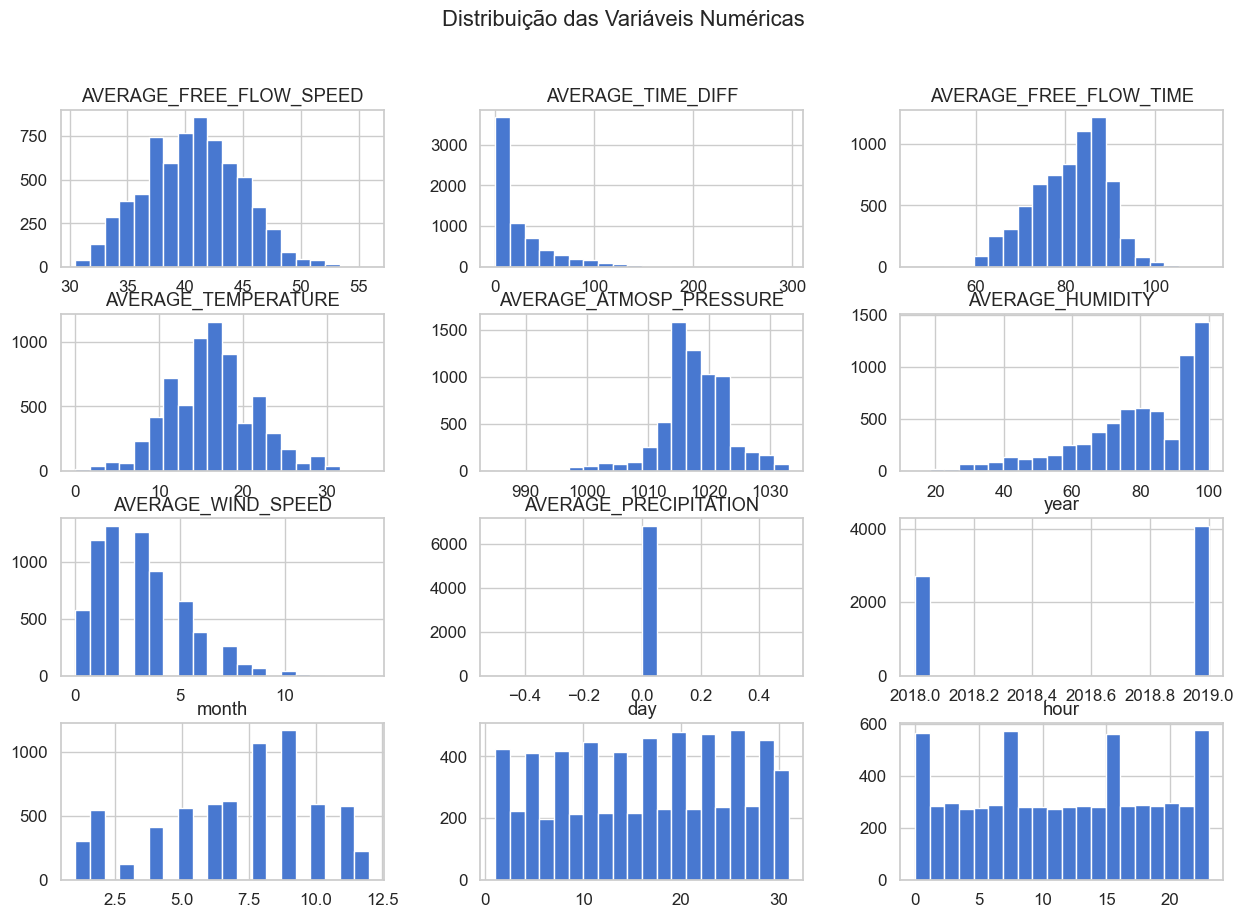

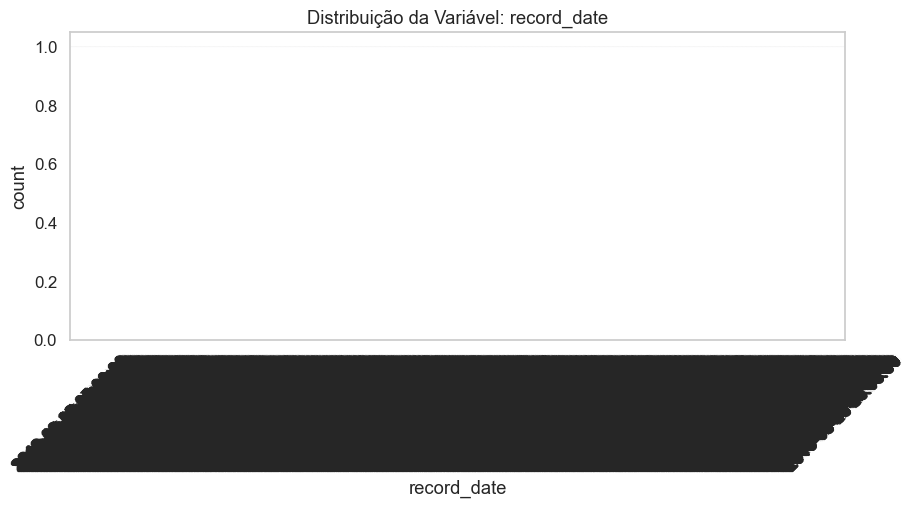

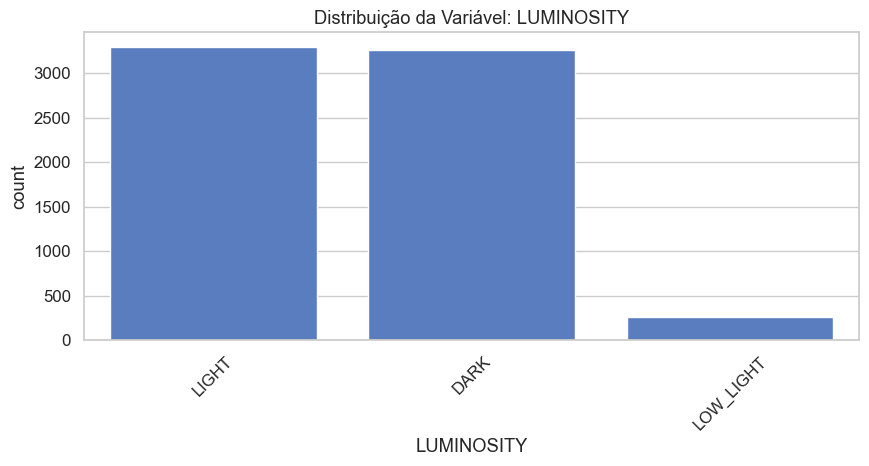

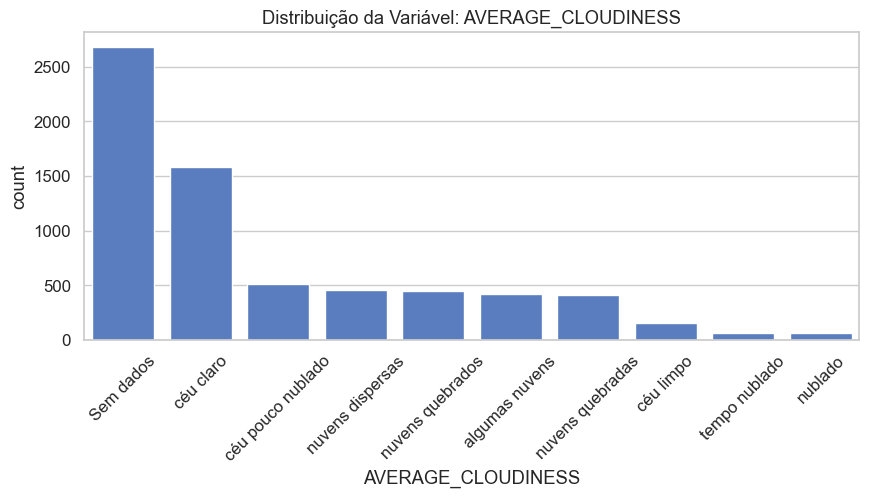

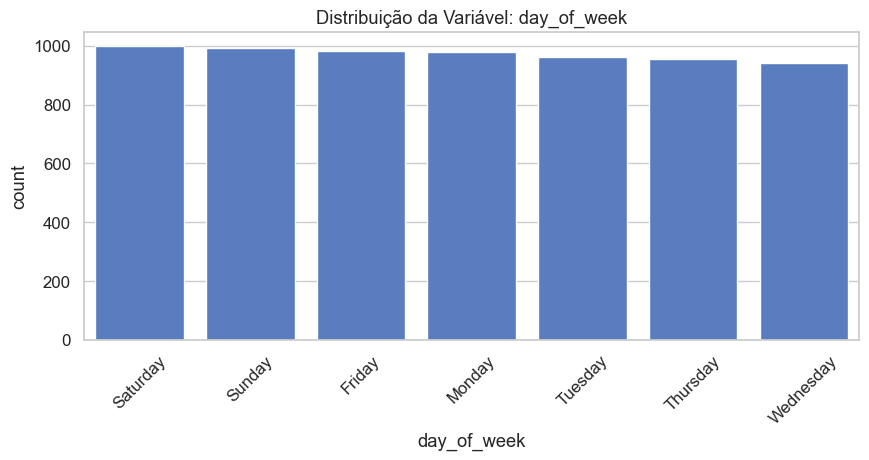

In [14]:
# ==============================
# 7. Distribuição das variáveis
# ==============================
numeric_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(exclude=np.number).columns.drop(target, errors='ignore')

df[numeric_cols].hist(bins=20, figsize=(15,10))
plt.suptitle("Distribuição das Variáveis Numéricas")
plt.show()

for col in categorical_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Distribuição da Variável: {col}")
    plt.xticks(rotation=45)
    plt.show()



📊 Correlação das variáveis numéricas com o target:
target_num                 1.000000
AVERAGE_TIME_DIFF          0.789424
AVERAGE_FREE_FLOW_SPEED    0.155690
AVERAGE_WIND_SPEED         0.096712
hour                       0.084492
AVERAGE_TEMPERATURE        0.034546
year                       0.028683
month                     -0.000204
day                       -0.006289
AVERAGE_ATMOSP_PRESSURE   -0.027441
AVERAGE_FREE_FLOW_TIME    -0.071911
AVERAGE_HUMIDITY          -0.073977
AVERAGE_PRECIPITATION           NaN
Name: target_num, dtype: float64


C:\Users\sofia\AppData\Local\Temp\ipykernel_4144\549110977.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.index, y=corr.values, palette='viridis')


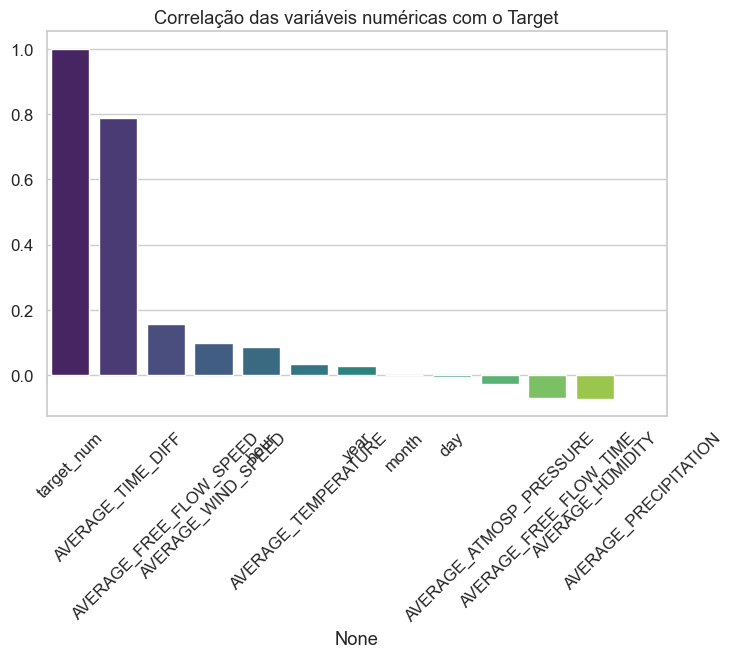

ValueError: Input y contains NaN.

In [15]:
# ==============================
# 8. Correlação e relevância
# ==============================
# Converter target para numérico
target_map = {'Low':0, 'Medium':1, 'High':2, 'Very_High':3}
df['target_num'] = df[target].map(target_map)

corr = df.corr(numeric_only=True)['target_num'].sort_values(ascending=False)
print("\n📊 Correlação das variáveis numéricas com o target:")
print(corr)

plt.figure(figsize=(8,5))
sns.barplot(x=corr.index, y=corr.values, palette='viridis')
plt.title("Correlação das variáveis numéricas com o Target")
plt.xticks(rotation=45)
plt.show()

# F-score e Mutual Information
num_feats = df.select_dtypes(include=np.number).drop(columns='target_num')
y = df['target_num']
f_scores, pvals = f_classif(num_feats.fillna(num_feats.median()), y)
mi = mutual_info_classif(num_feats.fillna(num_feats.median()), y, random_state=42)
feat_scores = pd.DataFrame({"feature": num_feats.columns, "F": f_scores, "p": pvals, "MI": mi}).sort_values("F", ascending=False)
display(feat_scores.head(10))


In [ ]:
# ==============================
# 9. Análise temporal
# ==============================
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='hour', hue=target, palette='mako')
plt.title("Distribuição do Trânsito por Hora do Dia")
plt.xlabel("Hora")
plt.ylabel("Número de Registos")
plt.legend(title="Nível de Trânsito")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='day_of_week', y='AVERAGE_TIME_DIFF', hue=target)
plt.title("Tempo médio vs Dia da Semana por Nível de Trânsito")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# ==============================
# 10. Análise meteorológica
# ==============================
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='AVERAGE_TEMPERATURE', y='AVERAGE_HUMIDITY', hue=target, alpha=0.6)
plt.title("Temperatura vs Humidade por Nível de Trânsito")
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='LUMINOSITY', hue=target, palette='mako')
plt.title("Luminosidade vs Nível de Trânsito")
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='AVERAGE_CLOUDINESS', hue=target, palette='mako')
plt.title("Nebulosidade vs Nível de Trânsito")
plt.xticks(rotation=30)
plt.show()


In [ ]:
# ==============================
# 11. Deteção de outliers
# ==============================
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['AVERAGE_TIME_DIFF', 'AVERAGE_FREE_FLOW_SPEED', 'AVERAGE_TEMPERATURE']])
plt.title("Boxplots — Deteção de Outliers")
plt.show()
